# <center> Project Luther: Prediction of Percent Return of Sneakers in the Sneaker Resell Market
  

## Introduction
The advancement in technology and social media media platforms has led to a huge increase in the accessbility for shoppers to purchase and sell shoes. As a result, flipping sneakers is one of the most lucrative ventures today: if you purchase the right sneakers(either new or pre-owned) and resell them, you can make a huge profit. According to Business Insider , the sneaker reselling market is estimted to be worth $1 billion industry. The sneaker resale market is bubbling and presents a huge oppurtunity for individuals who are continously looking for ways to increase their income and cashflow. The only question: **How do you know which shoe is worth purchasing and reselling in order to maximize profits? **



## Problem Statement

To make a model to predict percent return of pre-owned sneakers in the sneaker resell market.


## Feature and Data Exploration
#### Data:
Data was scraped using Beautiful Soup and Selenium. The brands Nike, Adidas, and Air Jordan were scraped for this model.
#### Summary of Features:
1. **Model(categorical)**: Name of the model of sneaker
2. **Colorway(cateogorical)**: Color of sneaker
3. **Retail_Price (numerical)** :  Retail Price of sneaker
4. **Release_Date (date)** : Date of the sneaker release
5. **Annual_High (numerical)** : Highest Price that the sneaker was sold for in a 12 month time period
6. **Annual_Low (numerical)** : Lowest Price that the sneaker was sold for in a 12 month time period
7. **Volatility (numerical)** : Voltaility percentage of the sneaker
8. **Yearly_shoes_sold (numerical)**: The amount of sneakers that were sold in a 12 month time period
9. **Avg_Sale_Price (numerical)**: Average price of the sneaker sold in a 12 month time period.
10. **Last Sell Price (numberical** : The last sale price of the shoe

Loading Datasets

In [1]:
#Loading the Libaries needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
#Loading the datasets
nike_df = pd.read_csv('Nike_StockX.csv')
adidas_df = pd.read_csv('Adidas_StockX.csv')
jordan_df = pd.read_csv('Jordan_StockX.csv')

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.cross_validation import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Checking out the data

In [4]:
#Concatting to one sneaker dataframe
sneakers_df = pd.concat([nike_df,adidas_df,jordan_df])

In [5]:
sneakers_df.head()

,Brand,Model,Color,Retail_Price,Release_Date,Last_Sell_Price,Annual_high,Annual_low,Volatility,Trade_Range,Yearly_shoes_sold,Price_Premium,Avg_Sale_Price
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,$170,2018-12-19,$391,"HIGH $1,000",| LOW $250,5.3%,$370 - $412,3516,130.0%,$389
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,$395,2018-12-15,$699,"HIGH $1,549",| LOW $621,5.1%,$664 - $734,2661,77.0%,$794
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,$170,2018-12-19,$634,HIGH $850,| LOW $300,6.3%,$594 - $674,3499,272.9%,$502
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,$170,2018-10-13,$330,HIGH $650,| LOW $215,4.8%,$314 - $346,4677,94.1%,$316
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,$170,2018-11-28,$260,HIGH $583,| LOW $210,12.5%,$228 - $292,4751,52.9%,$271


In [6]:
sneakers_df.shape

(3000, 13)

In [7]:
sneakers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 999
Data columns (total 13 columns):
Brand                3000 non-null object
Model                3000 non-null object
Color                2999 non-null object
Retail_Price         3000 non-null object
Release_Date         3000 non-null object
Last_Sell_Price      3000 non-null object
Annual_high          3000 non-null object
Annual_low           3000 non-null object
Volatility           3000 non-null object
Trade_Range          3000 non-null object
Yearly_shoes_sold    3000 non-null object
Price_Premium        3000 non-null object
Avg_Sale_Price       3000 non-null object
dtypes: object(13)
memory usage: 328.1+ KB


In [8]:
sneakers_df

,Brand,Model,Color,Retail_Price,Release_Date,Last_Sell_Price,Annual_high,Annual_low,Volatility,Trade_Range,Yearly_shoes_sold,Price_Premium,Avg_Sale_Price
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,$170,2018-12-19,$391,"HIGH $1,000",| LOW $250,5.3%,$370 - $412,3516,130.0%,$389
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,$395,2018-12-15,$699,"HIGH $1,549",| LOW $621,5.1%,$664 - $734,2661,77.0%,$794
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,$170,2018-12-19,$634,HIGH $850,| LOW $300,6.3%,$594 - $674,3499,272.9%,$502
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,$170,2018-10-13,$330,HIGH $650,| LOW $215,4.8%,$314 - $346,4677,94.1%,$316
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,$170,2018-11-28,$260,HIGH $583,| LOW $210,12.5%,$228 - $292,4751,52.9%,$271
5,Nike,Nike PG 2.5 Playstation Wolf Grey,WOLF GREY/MULTI-COLOR,$110,2018-12-01,$131,HIGH $350,| LOW $110,12.3%,$115 - $147,5924,19.1%,$153
6,Nike,Nike SB Dunk Low Concepts Purple Lobster,VOLTAGE PURPLE/VOLTAGE PURPLE,$130,2018-12-14,$299,"HIGH $1,250",| LOW $200,4.3%,$286 - $312,2766,130.0%,$261
7,Nike,Air Presto Off-White White (2018),WHITE/BLACK-CONE,$160,2018-08-03,$598,"HIGH $2,500",| LOW $430,4.9%,$569 - $627,7166,273.8%,$639
8,Nike,Air Max 1 Anniversary Red (2017/2018 Restock P...,WHITE/UNIVERSITY RED-NEUTRAL GREY-BLACK,$140,2017-09-21,$129,HIGH $345,| LOW $86,9.6%,$117 - $141,3232,-7.9%,$145
9,Nike,Air Presto Off-White Black (2018),BLACK/WHITE-CONE,$160,2018-7-27,$791,"HIGH $2,145",| LOW $495,6.5%,$739 - $842,7413,394.1%,$734


## Data Cleaning 

In [9]:
#Changing the columns to lower case letters
sneakers_df.columns = sneakers_df.columns.str.lower()

In [10]:
sneakers_df.head()

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,trade_range,yearly_shoes_sold,price_premium,avg_sale_price
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,$170,2018-12-19,$391,"HIGH $1,000",| LOW $250,5.3%,$370 - $412,3516,130.0%,$389
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,$395,2018-12-15,$699,"HIGH $1,549",| LOW $621,5.1%,$664 - $734,2661,77.0%,$794
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,$170,2018-12-19,$634,HIGH $850,| LOW $300,6.3%,$594 - $674,3499,272.9%,$502
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,$170,2018-10-13,$330,HIGH $650,| LOW $215,4.8%,$314 - $346,4677,94.1%,$316
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,$170,2018-11-28,$260,HIGH $583,| LOW $210,12.5%,$228 - $292,4751,52.9%,$271


In [11]:
#Remove the dollar signs[$] and percentages[%]
sneakers_df.retail_price = sneakers_df.retail_price.str.replace('$','')
sneakers_df.last_sell_price = sneakers_df.last_sell_price.str.replace('$','')
sneakers_df.avg_sale_price = sneakers_df.avg_sale_price.str.replace('$','')
sneakers_df.annual_high = sneakers_df.annual_high.str.replace('$','')
sneakers_df.annual_low = sneakers_df.annual_low.str.replace('$','')
sneakers_df.volatility = sneakers_df.volatility.str.replace('%','')


In [12]:
#Dropping Trade-range and price_premium
sneakers_df = sneakers_df.drop(columns=['trade_range','price_premium'])

In [13]:
sneakers_df.head()

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,avg_sale_price
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,170,2018-12-19,391,"HIGH 1,000",| LOW 250,5.3,3516,389
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,395,2018-12-15,699,"HIGH 1,549",| LOW 621,5.1,2661,794
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,170,2018-12-19,634,HIGH 850,| LOW 300,6.3,3499,502
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,170,2018-10-13,330,HIGH 650,| LOW 215,4.8,4677,316
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,170,2018-11-28,260,HIGH 583,| LOW 210,12.5,4751,271


In [14]:
#Removing commas from the two columns
sneakers_df.annual_high = sneakers_df.annual_high.str.replace(',','')
sneakers_df.annual_low = sneakers_df.annual_low.str.replace(',','')
#Removing 'HIGH' and "Low"
sneakers_df.annual_high = sneakers_df.annual_high.str.replace('HIGH','')
sneakers_df.annual_low = sneakers_df.annual_low.str.replace('|','')
sneakers_df.annual_low = sneakers_df.annual_low.str.replace('LOW','')

In [15]:
def price_to_float(df,cols):
    for c in cols:
        df[c] = pd.to_numeric(df[c], errors = 'coerce')


In [16]:
float_list = ['retail_price', 'last_sell_price','annual_high', 'annual_low','volatility', 'yearly_shoes_sold','avg_sale_price']

In [17]:
#Clean up dataframe so values are floats
price_to_float(sneakers_df,float_list)

In [18]:
#Reset index of the dataframe
sneakers_df = sneakers_df.reset_index(drop=True)

In [19]:
#Dropping rows with '0' in them
sneakers_df.replace('0', np.nan,inplace=True)
sneakers_df.dropna(axis=0, inplace=True)

In [20]:
sneakers_df.shape

(2646, 11)

In [21]:
#Changing release_date to datetime
sneakers_df['release_date'] = sneakers_df['release_date']
sneakers_df.release_date = pd.to_datetime(sneakers_df.release_date)

In [22]:
sneakers_df['year'] = sneakers_df['release_date'].dt.year

In [23]:
sneakers_df['month'] = sneakers_df['release_date'].dt.month

In [24]:
sneakers_df

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,avg_sale_price,year,month
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,170.0,2018-12-19,391.0,1000.0,250.0,5.3,3516.0,389.0,2018,12
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,395.0,2018-12-15,699.0,1549.0,621.0,5.1,2661.0,794.0,2018,12
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,170.0,2018-12-19,634.0,850.0,300.0,6.3,3499.0,502.0,2018,12
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,170.0,2018-10-13,330.0,650.0,215.0,4.8,4677.0,316.0,2018,10
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,170.0,2018-11-28,260.0,583.0,210.0,12.5,4751.0,271.0,2018,11
5,Nike,Nike PG 2.5 Playstation Wolf Grey,WOLF GREY/MULTI-COLOR,110.0,2018-12-01,131.0,350.0,110.0,12.3,5924.0,153.0,2018,12
6,Nike,Nike SB Dunk Low Concepts Purple Lobster,VOLTAGE PURPLE/VOLTAGE PURPLE,130.0,2018-12-14,299.0,1250.0,200.0,4.3,2766.0,261.0,2018,12
7,Nike,Air Presto Off-White White (2018),WHITE/BLACK-CONE,160.0,2018-08-03,598.0,2500.0,430.0,4.9,7166.0,639.0,2018,8
8,Nike,Air Max 1 Anniversary Red (2017/2018 Restock P...,WHITE/UNIVERSITY RED-NEUTRAL GREY-BLACK,140.0,2017-09-21,129.0,345.0,86.0,9.6,3232.0,145.0,2017,9
9,Nike,Air Presto Off-White Black (2018),BLACK/WHITE-CONE,160.0,2018-07-27,791.0,2145.0,495.0,6.5,7413.0,734.0,2018,7


In [25]:
#Making metric : (avg sale price - retail price / retail price)
sneakers_df['price_premium'] = np.divide(np.subtract(sneakers_df['avg_sale_price'],sneakers_df['retail_price']),sneakers_df['retail_price'])


In [26]:
#From StockX site
adidas_list = ['y-3', 'y3', 'adidas','yeezy', 'nmd']
nike_list = ['jordan','nike','foamposite','air','kobe','lebron','kd','sf','kyrie','lunar','cavs',
                 'pg','lebron','flyknit']

In [27]:
#Creating individual lines from brand
sneakers_df['line'] = sneakers_df['model'] .str.split().str.get(0).str.lower()

In [28]:
sneakers_df

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,avg_sale_price,year,month,price_premium,line
0,Nike,Air Force 1 Low Off-White Volt,VOLT/HYPER JADE-CONE-BLACK,170.0,2018-12-19,391.0,1000.0,250.0,5.3,3516.0,389.0,2018,12,1.288235,air
1,Nike,Air Fear Of God 1 Black,BLACK/BLACK,395.0,2018-12-15,699.0,1549.0,621.0,5.1,2661.0,794.0,2018,12,1.010127,air
2,Nike,Air Force 1 Low Off-White Black White,BLACK/WHITE-CONE-BLACK,170.0,2018-12-19,634.0,850.0,300.0,6.3,3499.0,502.0,2018,12,1.952941,air
3,Nike,Nike Zoom Fly Off-White Black Silver,BLACK/WHITE-CONE,170.0,2018-10-13,330.0,650.0,215.0,4.8,4677.0,316.0,2018,10,0.858824,nike
4,Nike,Nike Zoom Fly Off-White Pink,TULIP PINK/RACER PINK,170.0,2018-11-28,260.0,583.0,210.0,12.5,4751.0,271.0,2018,11,0.594118,nike
5,Nike,Nike PG 2.5 Playstation Wolf Grey,WOLF GREY/MULTI-COLOR,110.0,2018-12-01,131.0,350.0,110.0,12.3,5924.0,153.0,2018,12,0.390909,nike
6,Nike,Nike SB Dunk Low Concepts Purple Lobster,VOLTAGE PURPLE/VOLTAGE PURPLE,130.0,2018-12-14,299.0,1250.0,200.0,4.3,2766.0,261.0,2018,12,1.007692,nike
7,Nike,Air Presto Off-White White (2018),WHITE/BLACK-CONE,160.0,2018-08-03,598.0,2500.0,430.0,4.9,7166.0,639.0,2018,8,2.993750,air
8,Nike,Air Max 1 Anniversary Red (2017/2018 Restock P...,WHITE/UNIVERSITY RED-NEUTRAL GREY-BLACK,140.0,2017-09-21,129.0,345.0,86.0,9.6,3232.0,145.0,2017,9,0.035714,air
9,Nike,Air Presto Off-White Black (2018),BLACK/WHITE-CONE,160.0,2018-07-27,791.0,2145.0,495.0,6.5,7413.0,734.0,2018,7,3.587500,air


In [29]:
#Creating brands off the model names
sneakers_df.brand.str.lower().unique()

array(['nike', 'adidas'], dtype=object)

In [30]:
sneakers_df['line'].unique()

array(['air', 'nike', 'kyrie', 'lebron', 'kobe', 'kd', 'flyknit', 'sf',
       'nikecourt', 'pg', 'shake', 'lunar', 'penny', 'adidas', 'ace',
       'harden', 'y-3', 'y3', 'jordan'], dtype=object)

In [31]:
sneakers_df.tail()

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,avg_sale_price,year,month,price_premium,line
2995,Nike,Jordan 4 Retro Alternate 89 (GS),WHITE/BLACK-GYM RED,140.0,2016-01-02,170.0,228.0,100.0,14.3,79.0,166.0,2016,1,0.185714,jordan
2996,Nike,Jordan XXX1 Why Not? Cement,CEMENT GREY/BLACK-DARK GREY-WHITE,185.0,2017-04-29,178.0,270.0,130.0,17.3,181.0,194.0,2017,4,0.048649,jordan
2997,Nike,Jordan 1 Retro High OG Sail,SAIL/UNIVERSITY RED,160.0,2017-06-20,215.0,313.0,85.0,15.7,1338.0,160.0,2017,6,0.000000,jordan
2998,Nike,Jordan 20 OG Midwest Red,VARSITY RED/WHITE-BLACK,175.0,2005-07-01,180.0,240.0,105.0,21.8,10.0,179.0,2005,7,0.022857,jordan
2999,Nike,Jordan 1 Mid SE Triple Black Patent (W),BLACK/BLACK-BLACK-BLACK,110.0,2018-12-20,185.0,185.0,126.0,13.1,3.0,154.0,2018,12,0.400000,jordan


In [32]:
#Reindexing after dropping rows
sneakers_df.reset_index(drop=True,inplace=True)

In [33]:
#Lower case the brand
sneakers_df.brand = sneakers_df.brand.str.lower()

In [34]:
sneakers_df['model'] = sneakers_df['model'].str.lower()

In [35]:
#Cleaing color of colorway shoes so it's just basic (grey, white, or black) or other
sneakers_df['main_color'] = sneakers_df.color.str.split('/').str.get(0).str.lower()

In [36]:
colorlist = ['white','black','grey']

In [37]:
def colorsep(x):
    if x in colorlist:
        x = 'basic'
    elif x not in colorlist:
        x = 'other'
    return x

In [38]:
sneakers_df['main_color'] = sneakers_df['main_color'].apply(lambda x:colorsep(x))

In [39]:
sneakers_df.line.unique()

array(['air', 'nike', 'kyrie', 'lebron', 'kobe', 'kd', 'flyknit', 'sf',
       'nikecourt', 'pg', 'shake', 'lunar', 'penny', 'adidas', 'ace',
       'harden', 'y-3', 'y3', 'jordan'], dtype=object)

In [40]:
#Adding sb to nike line
sneakers_df.loc[((sneakers_df['model'].str.contains('sb')) & (sneakers_df['brand'] == 'nike')),'line'] = 'sb' 


In [41]:
#Adding yeezy to line column
sneakers_df.loc[((sneakers_df['model'].str.contains('yeezy')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'yeezy' 


In [42]:
#Adding nmd cat to line
sneakers_df.loc[((sneakers_df['model'].str.contains('nmd')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'nmd'

In [43]:
#adding ultraboost cat to line
sneakers_df.loc[((sneakers_df['model'].str.contains('ultra boost')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'ultra boost'


In [44]:
sneakers_df.loc[((sneakers_df['model'].str.contains('y-3')) & (sneakers_df['brand'] == 'adidas')),'line'] = 'y3'


In [45]:
sneakers_df.line.unique()

array(['air', 'nike', 'sb', 'kyrie', 'lebron', 'kobe', 'kd', 'flyknit',
       'sf', 'nikecourt', 'pg', 'shake', 'lunar', 'penny', 'yeezy', 'nmd',
       'ultra boost', 'adidas', 'y3', 'harden', 'jordan'], dtype=object)

# Exploratory Analysis

In [46]:
def make_hist(df,column, title= None, xlabel =''):
    fig = plt.figure(figsize=(10,4))
    sns.distplot(df[column] , bins = 25)
    plt.ylabel('Count')
    plt.xlabel(xlabel)
    plt.title(column if not title else title)

In [47]:
def make_bar(df, xcolumn, ycolumn, title=None, xlabel='', ylabel=''):
    fig = plt.figure(figsize=(10,4))
    ax = df.groupby(xcolumn)[ycolumn].mean().plot(kind = 'bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [48]:
#Making metric : (avg sale price - retail price / retail price)
sneakers_df['price_premium'] =np.divide(np.subtract(sneakers_df['avg_sale_price'],sneakers_df['retail_price']),sneakers_df['retail_price'])


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


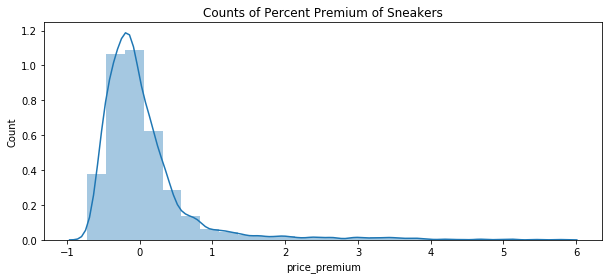

In [49]:
make_hist(sneakers_df, column = 'price_premium',xlabel = 'price_premium', title = 'Counts of Percent Premium of Sneakers',)

Target value appears to be skewed the right

Log transformed price prenium feature in order to make the data more "normal"

In [50]:
sneakers_df['log_price_premium'] = np.log(sneakers_df.price_premium+1)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


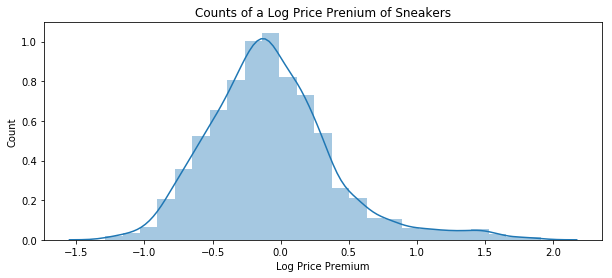

In [51]:
make_hist(sneakers_df,column = 'log_price_premium', xlabel = 'Log Price Premium', title ='Counts of a Log Price Prenium of Sneakers')

In [52]:
cat_feats = ['line','brand','main_color']

In [53]:
sneakers_df[cat_feats].astype('category').describe()

,line,brand,main_color
count,2646,2646,2646
unique,21,2,2
top,jordan,nike,other
freq,924,1850,1522


In [54]:
sneakers_df

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,avg_sale_price,year,month,price_premium,line,main_color,log_price_premium
0,nike,air force 1 low off-white volt,VOLT/HYPER JADE-CONE-BLACK,170.0,2018-12-19,391.0,1000.0,250.0,5.3,3516.0,389.0,2018,12,1.288235,air,other,0.827781
1,nike,air fear of god 1 black,BLACK/BLACK,395.0,2018-12-15,699.0,1549.0,621.0,5.1,2661.0,794.0,2018,12,1.010127,air,basic,0.698198
2,nike,air force 1 low off-white black white,BLACK/WHITE-CONE-BLACK,170.0,2018-12-19,634.0,850.0,300.0,6.3,3499.0,502.0,2018,12,1.952941,air,basic,1.082802
3,nike,nike zoom fly off-white black silver,BLACK/WHITE-CONE,170.0,2018-10-13,330.0,650.0,215.0,4.8,4677.0,316.0,2018,10,0.858824,nike,basic,0.619944
4,nike,nike zoom fly off-white pink,TULIP PINK/RACER PINK,170.0,2018-11-28,260.0,583.0,210.0,12.5,4751.0,271.0,2018,11,0.594118,nike,other,0.466320
5,nike,nike pg 2.5 playstation wolf grey,WOLF GREY/MULTI-COLOR,110.0,2018-12-01,131.0,350.0,110.0,12.3,5924.0,153.0,2018,12,0.390909,nike,other,0.329958
6,nike,nike sb dunk low concepts purple lobster,VOLTAGE PURPLE/VOLTAGE PURPLE,130.0,2018-12-14,299.0,1250.0,200.0,4.3,2766.0,261.0,2018,12,1.007692,sb,other,0.696986
7,nike,air presto off-white white (2018),WHITE/BLACK-CONE,160.0,2018-08-03,598.0,2500.0,430.0,4.9,7166.0,639.0,2018,8,2.993750,air,basic,1.384731
8,nike,air max 1 anniversary red (2017/2018 restock p...,WHITE/UNIVERSITY RED-NEUTRAL GREY-BLACK,140.0,2017-09-21,129.0,345.0,86.0,9.6,3232.0,145.0,2017,9,0.035714,air,basic,0.035091
9,nike,air presto off-white black (2018),BLACK/WHITE-CONE,160.0,2018-07-27,791.0,2145.0,495.0,6.5,7413.0,734.0,2018,7,3.587500,air,basic,1.523335


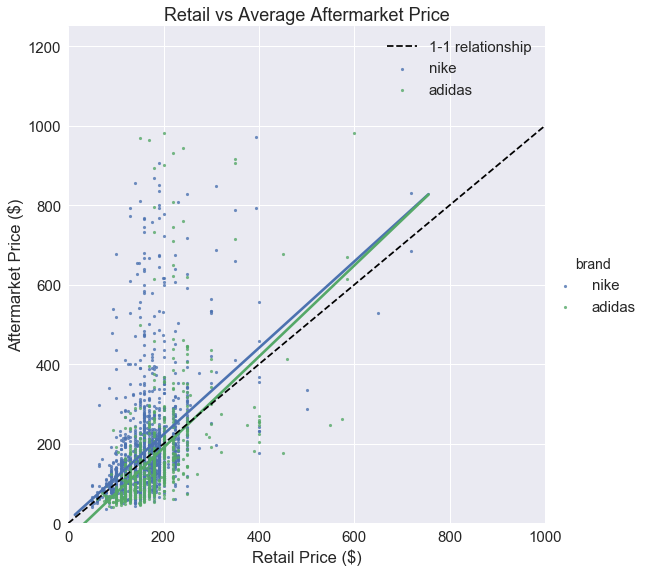

In [55]:
# See a 1-to-1 linear line for retail Price vs Aftermarket price
sns.set(font_scale=1.5)
sns.lmplot(x='retail_price', y ='avg_sale_price', data=sneakers_df, hue='brand', 
           fit_reg=True, size=8, scatter_kws={"s": 10}, ci=None)
plt.plot(np.linspace(0,2000,2000), np.linspace(0,2000,2000), linestyle='--', 
         color='black', label='1-1 relationship')
plt.xlim([0,1000])
plt.ylim([0,1250])
plt.title('Retail vs Average Aftermarket Price')
plt.xlabel('Retail Price ($)')
plt.ylabel('Aftermarket Price ($)')
plt.legend(loc='best')
plt.show()

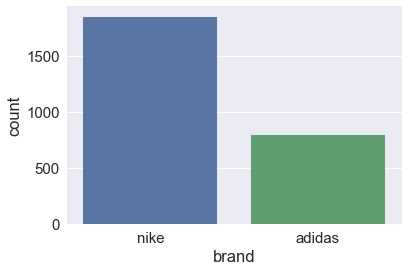

In [56]:
sns.countplot(sneakers_df.brand)

Nike has a higher count compared to adidas. Jordans were collapsed to Nike

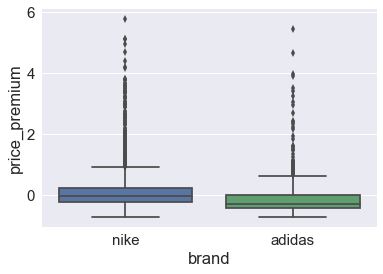

In [57]:
sns.boxplot(y=sneakers_df.price_premium,x = sneakers_df.brand)

In [58]:
sneakers_df.groupby(['brand'])['avg_sale_price'].mean()

brand
adidas    158.143216
nike      180.415676
Name: avg_sale_price, dtype: float64

In [59]:
def make_bar(df, xcolumn, ycolumn, title=None, xlabel='', ylabel=''):
    fig = plt.figure(figsize=(10,4))
    ax = df.groupby(xcolumn)[ycolumn].mean()*100
    ax.plot(kind = 'bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

In [60]:
sneakerline = sneakers_df.groupby(['line'])['price_premium'].mean()*100

In [61]:
sneakerline = sneakers_df.groupby(['line'])['price_premium'].describe()*100

In [62]:
sneakerline = sneakerline['75%'].sort_values(ascending = False)

In [63]:
sneakerline = sneakerline.sort_values(ascending = False)

In [64]:
sneakerline = sneakerline[0:5]

In [65]:
std = sneakers_df.groupby(['line'])['price_premium'].std().sort_values(ascending = False)[0:5]

In [66]:
std

line
kd       1.386922
yeezy    1.033022
kobe     1.029294
sb       1.012748
nike     0.810011
Name: price_premium, dtype: float64

In [67]:
sneakerline = sneakerline.sort_values(ascending = False)

In [68]:
sneakerline.index

Index(['yeezy', 'sb', 'nikecourt', 'lunar', 'jordan'], dtype='object', name='line')

In [69]:
import matplotlib.pyplot as plt
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 432x288 with 0 Axes>

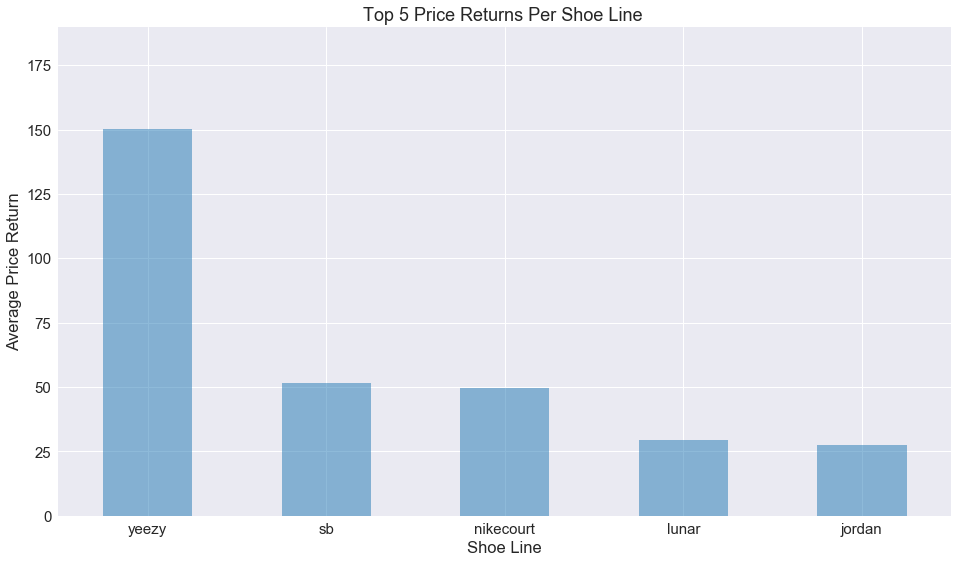

In [70]:

ax = sneakerline
plt.figure(figsize=(16,9))
ax.plot(kind='bar',ecolor='black',alpha = 0.5, align='center',grid=True, colormap ='tab10')
plt.xticks(rotation=0)
plt.ylim([0, 190])
plt.xlabel('Shoe Line')
plt.ylabel('Average Price Return')
plt.title('Top 5 Price Returns Per Shoe Line ')
plt.savefig('yeezyfinal.svg', bbox_inches = "tight")


In [71]:
plt.savefig('shoe.svg')

<Figure size 432x288 with 0 Axes>

Bar plot showing the different log average perent price prenium of each shoe line for the brand. Shows the relative 'shoelines' that have a positive percent increase.

In [72]:
sneakers_df.corr()['log_price_premium'].sort_values(ascending=False)[:5]

log_price_premium    1.000000
price_premium        0.913954
avg_sale_price       0.794240
last_sell_price      0.780957
annual_low           0.746861
Name: log_price_premium, dtype: float64

In [73]:
correlationplot

NameError: name 'correlationplot' is not defined

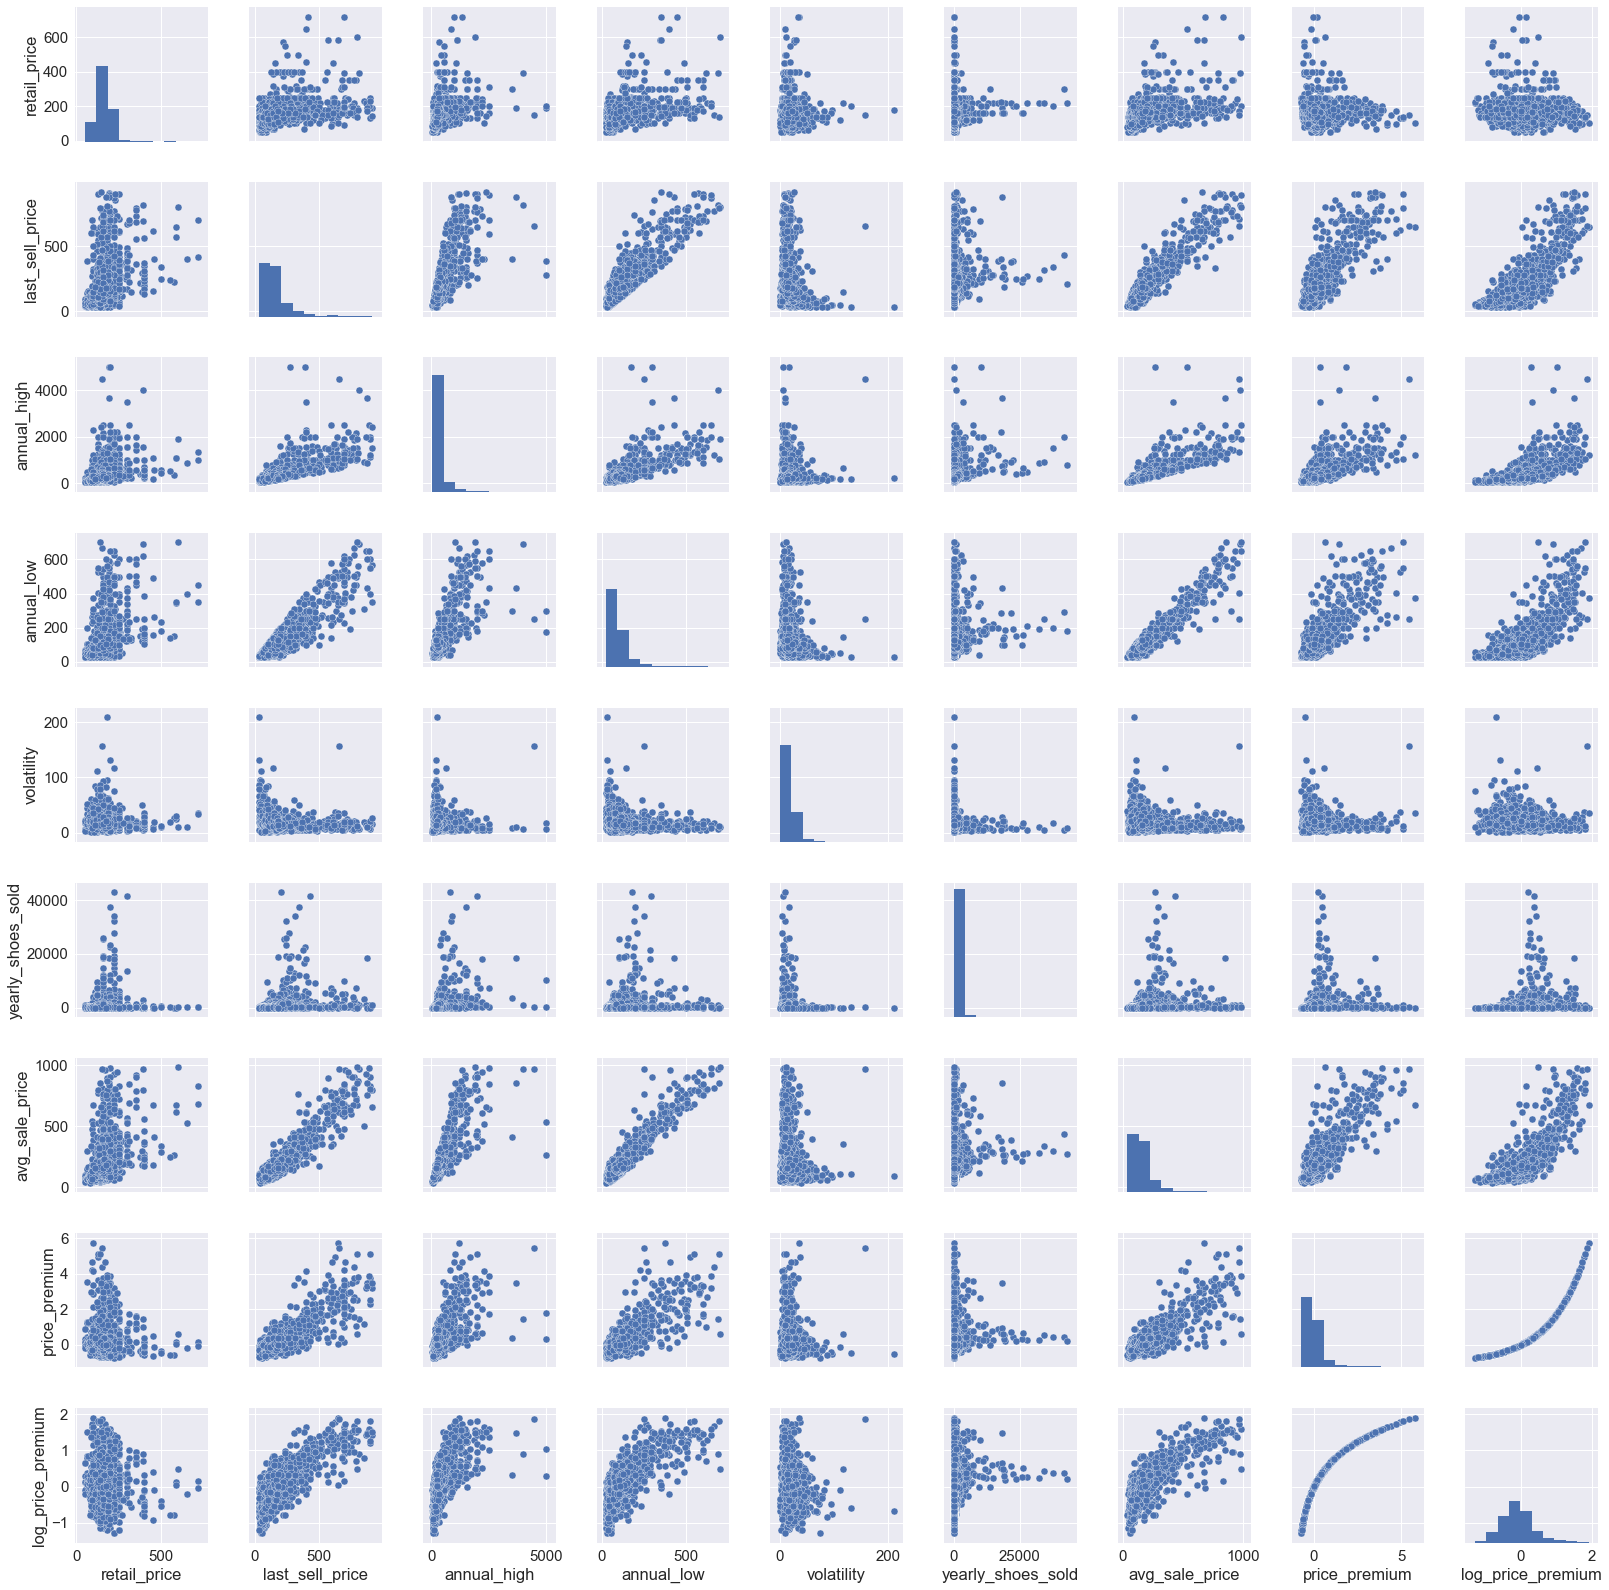

In [77]:
sns.pairplot(sneakers_df)

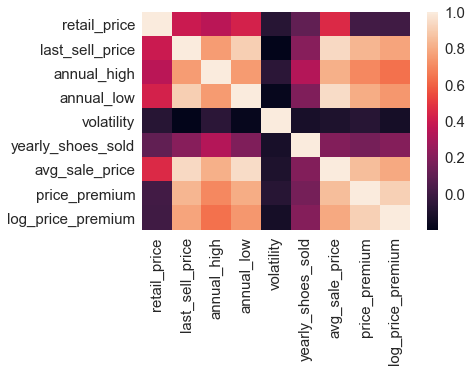

In [78]:
correlationplot = sns.heatmap(sneakers_df.corr())
plt.savefig('heatmap.svg', bbox_inches = "tight")

Pairplot and Heatmap of the correlations of the numberical features.. Looks last_sell price, annual high and annual low has positive correlation values to the target variable.

We need to make dummy variables for all the cateogorical values

In [79]:
cat_feats

['line', 'brand', 'main_color']

In [80]:
for cat in cat_feats:
    dummies = pd.get_dummies(sneakers_df[cat],drop_first=True, prefix = cat)
    sneakers_df = sneakers_df.join(dummies)
    

In [81]:
sneakers_df.columns

Index(['brand', 'model', 'color', 'retail_price', 'release_date',
       'last_sell_price', 'annual_high', 'annual_low', 'volatility',
       'yearly_shoes_sold', 'avg_sale_price', 'price_premium', 'line',
       'main_color', 'log_price_premium', 'line_air', 'line_flyknit',
       'line_harden', 'line_jordan', 'line_kd', 'line_kobe', 'line_kyrie',
       'line_lebron', 'line_lunar', 'line_nike', 'line_nikecourt', 'line_nmd',
       'line_penny', 'line_pg', 'line_sb', 'line_sf', 'line_shake',
       'line_ultra boost', 'line_y3', 'line_yeezy', 'brand_nike',
       'main_color_other'],
      dtype='object')

In [82]:
sneakers_df.head()

,brand,model,color,retail_price,release_date,last_sell_price,annual_high,annual_low,volatility,yearly_shoes_sold,...,line_penny,line_pg,line_sb,line_sf,line_shake,line_ultra boost,line_y3,line_yeezy,brand_nike,main_color_other
0,nike,air force 1 low off-white volt,VOLT/HYPER JADE-CONE-BLACK,170.0,2018-12-19,391.0,1000.0,250.0,5.3,3516.0,...,0,0,0,0,0,0,0,0,1,1
1,nike,air fear of god 1 black,BLACK/BLACK,395.0,2018-12-15,699.0,1549.0,621.0,5.1,2661.0,...,0,0,0,0,0,0,0,0,1,0
2,nike,air force 1 low off-white black white,BLACK/WHITE-CONE-BLACK,170.0,2018-12-19,634.0,850.0,300.0,6.3,3499.0,...,0,0,0,0,0,0,0,0,1,0
3,nike,nike zoom fly off-white black silver,BLACK/WHITE-CONE,170.0,2018-10-13,330.0,650.0,215.0,4.8,4677.0,...,0,0,0,0,0,0,0,0,1,0
4,nike,nike zoom fly off-white pink,TULIP PINK/RACER PINK,170.0,2018-11-28,260.0,583.0,210.0,12.5,4751.0,...,0,0,0,0,0,0,0,0,1,1


In [83]:
#Dropping Redudant columns after the entering the dummy variables
sneakers_df.drop(columns = ['model', 'color', 'line', 'main_color','brand','release_date'],inplace=True)

In [84]:
sneakers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 31 columns):
retail_price         2646 non-null float64
last_sell_price      2646 non-null float64
annual_high          2646 non-null float64
annual_low           2646 non-null float64
volatility           2646 non-null float64
yearly_shoes_sold    2646 non-null float64
avg_sale_price       2646 non-null float64
price_premium        2646 non-null float64
log_price_premium    2646 non-null float64
line_air             2646 non-null uint8
line_flyknit         2646 non-null uint8
line_harden          2646 non-null uint8
line_jordan          2646 non-null uint8
line_kd              2646 non-null uint8
line_kobe            2646 non-null uint8
line_kyrie           2646 non-null uint8
line_lebron          2646 non-null uint8
line_lunar           2646 non-null uint8
line_nike            2646 non-null uint8
line_nikecourt       2646 non-null uint8
line_nmd             2646 non-null uint8
line_penny    

# Metric Selection

RMSE will be used as the metric for this model beacuse we are only interested in the prediction accuracy of the model.

In [110]:
def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [111]:
#X = calculate_vif_(X)

# Model Selection

Linear Regression as the base model. Linear Regression with regularization as an optimizer? XGBoost Regression?

In [85]:
#Splitting training and test datasets on the main dataset
y = sneakers_df.log_price_premium *100

In [163]:
 #Getting rid of unnecessary columns
X = sneakers_df.drop(columns=['log_price_premium','volatility','price_premium'])

In [211]:
X.head()

,retail_price,last_sell_price,annual_high,annual_low,yearly_shoes_sold,avg_sale_price,line_air,line_flyknit,line_harden,line_jordan,...,line_penny,line_pg,line_sb,line_sf,line_shake,line_ultra boost,line_y3,line_yeezy,brand_nike,main_color_other
0,170.0,391.0,1000.0,250.0,3516.0,389.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,395.0,699.0,1549.0,621.0,2661.0,794.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,170.0,634.0,850.0,300.0,3499.0,502.0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,170.0,330.0,650.0,215.0,4677.0,316.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170.0,260.0,583.0,210.0,4751.0,271.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [279]:
#Getting rid of unnecessary columns
X = sneakers_df.drop(columns=['log_price_premium','price_premium','volatility','avg_sale_price'])

## Base Model Linear Regression :

In [280]:
X.head()

,retail_price,last_sell_price,annual_high,annual_low,yearly_shoes_sold,line_air,line_flyknit,line_harden,line_jordan,line_kd,...,line_penny,line_pg,line_sb,line_sf,line_shake,line_ultra boost,line_y3,line_yeezy,brand_nike,main_color_other
0,170.0,391.0,1000.0,250.0,3516.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,395.0,699.0,1549.0,621.0,2661.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,170.0,634.0,850.0,300.0,3499.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,170.0,330.0,650.0,215.0,4677.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170.0,260.0,583.0,210.0,4751.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [284]:
intlist = ['last_sell_price', 'annual_high', 'annual_low','retail_price','yearly_shoes_sold']

In [285]:
#Scaling all the int features
for item in intlist:
    X[item] = (X[item] - np.mean(X[item]))/np.std(X[item])

In [283]:
X.head()

,retail_price,last_sell_price,annual_high,annual_low,yearly_shoes_sold,line_air,line_flyknit,line_harden,line_jordan,line_kd,...,line_penny,line_pg,line_sb,line_sf,line_shake,line_ultra boost,line_y3,line_yeezy,brand_nike,main_color_other
0,170.0,1.735625,1.931210,1.680456,3516.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,395.0,4.120106,3.505604,5.973337,2661.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,170.0,3.616888,1.501048,2.259011,3499.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,170.0,1.263374,0.927499,1.275467,4677.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,170.0,0.721447,0.735359,1.217612,4751.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [174]:
res2 = sm.OLS(y,sm.add_constant(X)).fit()
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:      log_price_premium   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     476.8
Date:                Fri, 25 Jan 2019   Prob (F-statistic):               0.00
Time:                        14:49:13   Log-Likelihood:                -11586.
No. Observations:                2646   AIC:                         2.323e+04
Df Residuals:                    2618   BIC:                         2.339e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -21.4409      1.66

# Linear Regression

In [238]:
lr = LinearRegression()

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [240]:
#Applying std scalar and linear regression.

pipeline = Pipeline([(('lr',LinearRegression()))])
cv = KFold(n_splits=5,shuffle=True)

#RMSEscores = cross_val_score(pipeline, X, y, cv = cv, scoring = 'neg_mean_squared_error')

In [241]:
grid_search = GridSearchCV(lr, param_grid={}, cv = cv, verbose=1,scoring = 'neg_mean_squared_error')

In [242]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [243]:
lr_predictions = grid_search.predict(X_test)

In [244]:
np.sqrt(np.mean((lr_predictions - y_test)**2))

27.74840336703222

In [152]:
lr_weights = grid_search.best_estimator_.coef_

# Ridge

In [183]:
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rdg_reg = Ridge()
clf = GridSearchCV(rdg_reg,params,cv=cv,verbose = 1, scoring = 'neg_mean_squared_error')
clf.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [184]:
clf.best_params_

{'alpha': 4}

In [185]:
ridgeweights = clf.best_estimator_.coef_

In [186]:
ridge_predictions = clf.predict(X_test)

In [187]:
np.sqrt(np.mean((ridge_predictions - y_test)**2))

20.83260515937327

In [188]:
clf.best_params_

{'alpha': 4}

# Lasso

In [189]:
params={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso = Lasso()
clf2 = GridSearchCV(lasso,params,cv=cv,verbose = 1, scoring = 'neg_mean_squared_error')
clf2.fit(X_train,y_train)

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [190]:
clf2.best_params_

{'alpha': 0.05}

In [191]:
lasso_weights = clf2.best_estimator_.coef_

In [192]:
lasso_predictions = clf2.predict(X_test)

In [193]:
np.sqrt(np.mean((lasso_predictions - y_test)**2))

20.900921806414708

In [194]:
clf2.best_params_

{'alpha': 0.05}

# Elastic Net

In [195]:
params = {'alpha' : [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01], 
         "max_iter": [1, 5, 10,15,20,25],
          "l1_ratio": np.arange(0.0, 1.0, 0.1) }

In [196]:
enet = ElasticNet()

In [197]:
enetsearch = GridSearchCV(enet, param_grid=params, cv =cv, verbose=1, scoring = 'neg_mean_squared_error')

In [199]:
enetsearch.fit(X_train,y_train)

Fitting 5 folds for each of 780 candidates, totalling 3900 fits


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
       error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [25, 10, 4, 2, 1.0, 0.8, 0.5, 0.3, 0.2, 0.1, 0.05, 0.02, 0.01], 'max_iter': [1, 5, 10, 15, 20, 25], 'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [200]:
enetsearch.best_params_

{'alpha': 0.02, 'l1_ratio': 0.9, 'max_iter': 25}

In [201]:
enetweights = enetsearch.best_estimator_.coef_

In [202]:
enet_prediction = enetsearch.predict(X_test)

In [203]:
np.sqrt(np.mean((y_test - enet_prediction)**2))

21.487797343649827

# XG BOOST

In [245]:
import xgboost

In [287]:
#for tuning parameters
parameters_for_testing = {
   'colsample_bytree':[0.8],
    'gamma': [0],
    'min_child_weight':[1.5],
    'learning_rate':[0.07],
    'max_depth':[3],
    'n_estimators':[10000],
    'reg_alpha':[1e-2],
    'reg_lambda':[1e-2],
    'subsample':[0.6] }


                    
xgb_model = xgboost.XGBRegressor()
    
gsearch1 = GridSearchCV(estimator = xgb_model, cv=cv, param_grid = parameters_for_testing, n_jobs=-1,iid=False, verbose=10,scoring='neg_mean_squared_error')
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_
print('best params')
print (gsearch1.best_params_)
print('best score')
print (gsearch1.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV] colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6 
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, s

[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   14.9s remaining:   22.4s


[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-152.06214679174337, total=  12.6s
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-141.83263058115287, total=  12.8s
[CV]  colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_depth=3, min_child_weight=1.5, n_estimators=10000, reg_alpha=0.01, reg_lambda=0.01, subsample=0.6, score=-172.61548207642647, total=  13.1s


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:   15.2s remaining:   10.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


best params
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.07, 'max_depth': 3, 'min_child_weight': 1.5, 'n_estimators': 10000, 'reg_alpha': 0.01, 'reg_lambda': 0.01, 'subsample': 0.6}
best score
-156.8120128689746


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [288]:
gsearch1.best_score_

-156.8120128689746

In [289]:
gsearch1.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.07,
 'max_depth': 3,
 'min_child_weight': 1.5,
 'n_estimators': 10000,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 0.6}

In [290]:
gprediction = gsearch1.predict(X_test)

In [292]:
np.sqrt(np.mean((y_test - gprediction)**2))

11.093399550210403

In [198]:
from xgboost import plot_importance

In [125]:
gsearch1.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.07, max_delta_step=0,
       max_depth=3, min_child_weight=1.5, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0.01, reg_lambda=0.01, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.6)

In [141]:
# save the model to disk
filename = 'finalized_model_xg_boost.sav'
#pickle.dump(gsearch1, open(filename, 'wb'))
 


In [146]:
#Load the model to ipython
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model

In [160]:
result.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0,
 'learning_rate': 0.07,
 'max_depth': 3,
 'min_child_weight': 1.5,
 'n_estimators': 10000,
 'reg_alpha': 0.01,
 'reg_lambda': 0.01,
 'subsample': 0.6}

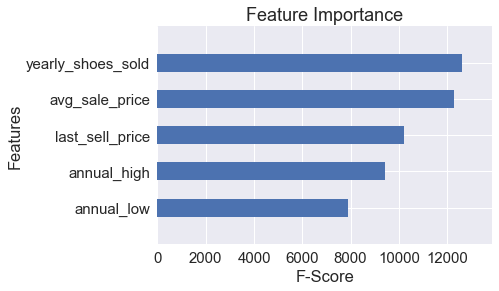

In [200]:
plot_importance(result.best_estimator_,max_num_features=5,show_values=False,ax=None, height=0.5, xlim=None, ylim=None, title='Feature Importance', xlabel='F-Score', ylabel='Features', importance_type='weight', grid=True)